## 24. Stochastic Processes

### 24.1 Introduction

A **stochastic process** $\{ X_t : t \in T \}$  is a collection of random variables.  We shall sometimes write $X(t)$ instead of $X_t$.  The variables $X_t$ take values in some set $\mathcal{X}$ called the **state space**.  The set $T$ is called the **index set** and for our purposes can be thought of as time.  The index set can be discrete, $T = \{0, 1, 2, \dots \}$ or continuous $T = [0, \infty)$ depending on the application.

Recall that if $X_1, \dots, X_n$ are random variables then we can write the joint density as

$$ f(x_1, \dots, x_n) = f(x_1) f(x_2 | x_1) \dots f(x_n | x_1, \dots, x_{n-1}) = \prod_{i=1}^n f(x_i | \text{past}_i) $$

where $\text{past}_i$ refers to all variables before $X_i$.

### 24.2 Markov Chains

The process $\{ X_n : n \in T \}$ is a **Markov Chain** if

$$ \mathbb{P}(X_n = x | X_0, \dots, X_{n-1}) = \mathbb{P}(X_n = x | X_{n-1})$$

for all $n$ and for all $x \in \mathcal{X}$.

For a Markov chain, the joint density function can be written as

$$ f(x_1, \dots, x_n) = f(x_1) f(x_2 | x_1) f(x_3 | x_2) \dots f(x_n | x_{n - 1}) $$

A Markov chain can be represented by the following DAG:

$$ X_1 \longrightarrow X_2 \longrightarrow X_3 \longrightarrow \cdots \longrightarrow X_n \longrightarrow \cdots $$

Each variable has a single parent, namely, the previous observation.

The theory of Markov chains is very rich and complex.  Our goal is to answer the following questions:

1. When does a Markov chain "settle down" into some sort of equilibrium?

2. How do we estimate the parameters of a Markov chain?

3. How can we construct Markov chains that converge to a given equilibrium and why would we want to do that?

Questions 1 and 2 will be approached this chapter, question 3 in the next chapter.

In [1]:
import numpy as np

def generate_random_walk(n, seed=None):
    if seed is not None:
        np.random.seed(seed)
    
    X = np.empty(n)
    X[0] = 0
    for i in range(1, n):
        X[i] = X[i - 1] + np.random.uniform(low=-1, high=1)
    
    return X

def generate_random_walk_bound(n, drift=-0.4, min_value=-10, seed=None):
    if seed is not None:
        np.random.seed(seed)
    
    X = np.empty(n)
    X[0] = 0
    for i in range(1, n):
        X[i] = max(X[i - 1] + drift, min_value) + np.random.uniform(low=-1, high=1)
    
    return X

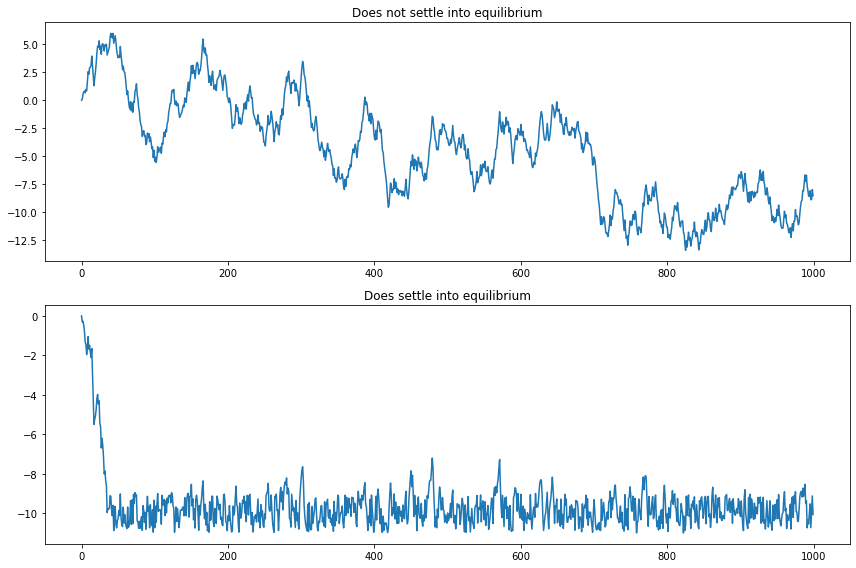

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 8))

A = generate_random_walk(1000, seed=0)
B = generate_random_walk_bound(1000, seed=0)

ax = plt.subplot(2, 1, 1)
ax.plot(np.arange(0, len(A)), A)
ax.set_title('Does not settle into equilibrium')

ax = plt.subplot(2, 1, 2)
ax.plot(np.arange(0, len(B)), B)
ax.set_title('Does settle into equilibrium')

plt.tight_layout()
plt.show()

#### Transition Probabilities

The key quantities of a Markov chain are the probabilities of jumping from one state into another state.

We call 

$$ \mathbb{P}(X_{n+1} = j | X_n = i) $$

the **transition probabilities**.  If the transition probabilities do not change with time, we say the chain is **homogeneous**.  In this case we define $p_{ij} = \mathbb{P}(X_{n+1} = j | X_n = i)$.  The matrix $P$ whose $(i, j)$ element is $p_{ij}$ is called the **transition matrix**.

We will only consider homogeneous chains.  Notice how each $P$ has two properties: (i) $p_{ij} \geq 0$ and (ii) $\sum_i p_{ij} = 1$.  Each row is a probability mass function.  A matrix with these properties is called a **stochastic matrix**.

Let

$$ p_{ij}(n) = \mathbb{P}(X_{m + n} = j | X_{m} = i) $$

be the probability of going from state $i$ to state $j$ in $n$ steps.  Let $P_n$ be the matrix whose $(i, j)$ element is $p_{ij}(n)$.  These are called the **$n$-step transition probabilities**.

**Theorem 24.9 (The Chapman-Kolmogorov equations)**.  The $n$-step probabilities satisfy

$$ p_{ij}(m + n) = \sum_k p_{ij}(m) p_{kj}(n) $$

**Proof**.  Recall that, in general,

$$ \mathbb{P}(X = x, Y = y) = \mathbb{P}(X = x) \mathbb{P}(Y = y | X = x) $$

This fact is true when conditioned in another variable,

$$ \mathbb{P}(X = x, Y = y | Z = z) = \mathbb{P}(X = x | Z = z) \mathbb{P}(Y = y | X = x, Z = z) $$

Also, recall the law of total probability:

$$ \mathbb{P}(X = x) = \sum_y \mathbb{P}(X = x, Y = y) $$

Using these facts and the Markov property we have:

$$
\begin{align}
p_{ij}(m + n) &= \mathbb{P}(X_{m + n} = j | X_0 = i) \\
&= \sum_k \mathbb{P}(X_{m + n} = j, X_m = k | X_0 = i) \\
&= \sum_k \mathbb{P}(X_{m + n} = j | X_m = k, X_0 = i) \mathbb{P}(X_m = k | X_0 = i) \\
&= \sum_k \mathbb{P}(X_{m + n} = j | X_m = k) \mathbb{P}(X_m = k | X_0 = i) \\
&= \sum_k p_{ik}(m) p_{kj}(n)
\end{align}
$$

Note that this definition is equivalent to matrix multiplication; hence we have shown that

$$ P_{m + n} = P_m P_n $$

By definition, $P_1 = P$.  Using the above theorem, we get

$$ P_n = P^n \equiv \underbrace{P \times P \times \cdots \times P}_{\text{multiply matrix } n \text{ times}} $$

Let $\mu_n = (\mu_n(1), \dots, \mu_n(N))$ be a row vector where

$$ \mu_n(i) = \mathbb{P}(X_n = i) $$

is the marginal probability that the chain is in state $i$ at time $n$.  In particular, $\mu_0$ is called the **initial distribution**.  To simulate a Markov chain, all you need to know is $\mu_0$ and $P$.  The simulation would look like this:

1. Draw $X_0 \sim \mu_0$.  Thus, $\mathbb{P}(X_0 = i) = \mu_0(i)$.
2. Suppose the outcome of step 1 is $i$.  Draw $X_1 \sim P$. In other words, $\mathbb{P}(X_1 = j | X_0 = i) = p_{ij}$.
3. Suppose the outcome of step 2 is $j$.  Draw $X_2 \sim P$. In other words, $\mathbb{P}(X_2 = k | X_1 = j) = p_{jk}$.

and so on.

It might be difficult to understand the meaning of $\mu_n$.  Imagine simulating the chain many times.  Collect all of the outcomes at time $n$ from all the chains.  This histogram would look approximately like $\mu_n$.  A consequence of the previous theorem is the following:

**Lemma 24.10**.  The marginal probabilities are given by

$$ \mu_n = \mu_0 P^n $$

**Proof**.

$$ \mu_n(j) = \mathbb{P}(X_n = j) = \sum_i \mathbb{P}(X_n = j | X_0 = i) \mathbb{P}(X_0 = i) = \sum_i \mu_0(i) p_{ij}(n) = \mu_0 P^n $$

**Summary**

1.  Transition matrix:  $P(i, j) = \mathbb{P}(X_{n+1} = j | X_n = i)$
2.  $n$-step matrix: $P_n(i, j) = \mathbb{P}(X_{m+n} = j | X_m = i)$
3.  $P_n = P^n$
4.  Marginal probabilities:  $\mu_n(i) = \mathbb{P}(X_n = i)$
5.  $\mu_n = \mu_0 P^n$

#### States

The states of a Markov chain can be classified according to various properties.

We say that $i$ **reaches** $j$ (or $j$ is **accessible** from $i$) if $p_{ij}(n) > 0$ for some $n$, and we write $i \rightarrow j$.  If $i \rightarrow j$ and $j \rightarrow i$ then we write $i \leftrightarrow j$ and we say that $i$ and $j$ **communicate**.

**Theorem 24.12**.  The communication relation satisfies the following properties:

1.  $i \leftrightarrow i$.
2.  If $i \leftrightarrow j$ then $j \leftrightarrow i$.
3.  If $i \leftrightarrow j$ and $j \leftrightarrow k$ then $i \leftrightarrow k$.
4.  The set of states $\mathcal{X}$ can be written as a disjoint union of **classes** $\mathcal{X} = \mathcal{X}_1 \cup \mathcal{X}_2 \cup \cdots$  where two states $i$ and $j$ communicate with each other if and only if they are in the same class.

If all states communicate with each other then the chain is called **irreducible**.  A set of states is **closed** if once you enter that set states you never leave.  A closet set consisting of a single state is called an **absorbing state**.

Suppose we start a chain in state $i$.  Will the chain ever return to state $i$?  If so, that state is called persistent or recurrent.

State $i$ is **recurrent** or **persistent** if 

$$ \mathbb{P}(X_n = i \text{ for some } n \geq 1 | X_0 = i) = 1 $$

Otherwise, state $i$ is **transient**.

**Theorem 24.15**.  A state $i$ is recurrent if and only if

$$ \sum_n p_{ii}(n) = \infty $$

A state $i$ is transient if and only if

$$ \sum_n p_{ii}(n) < \infty $$

**Proof**.  Define

$$ 
I_n = \begin{cases}
1 & \text{if } X_n = i \\
0 & \text{if } X_n \neq i
\end{cases}
$$

The number of times that the chain is in state $i$ is $Y = \sum_{n=0}^\infty I_n$.  The mean of $Y$, given that the chain starts in state $i$, is

$$
\begin{align}
\mathbb{E}(Y | X_0 = i) &= \sum_{n=0}^\infty \mathbb{E}(I_n | X_0 = i) \\
&= \sum_{n=0}^\infty \mathbb{P}(X_n = i | X_0 = i) \\
&= \sum_{n=0}^\infty p_{ii}(n)
\end{align}
$$

Define $a_i = \mathbb{P}(X_n = i \text{ for some } n \geq  1 | X_0 = i)$.  If $i$ is recurrent, $a_i = 1$.  Thus, the chain will eventually return to $i$.  Once it does, we argue again that since $a_i = 1$, the chain will return to state $i$ again.  By repeating this argument, we conclude that $\mathbb{E}(Y | X_0 = i) = \infty$.

If $i$ is transient, then $a_i < 1$.  When the chain is in state $i$, there is a probability $1 - a_i > 0$ that it will never return to state $i$.  Thus, the probability that the chain is in state $i$ exactly $n$ times is $a_i^{n - 1}(1 - a_i)$.  This is a geometric distribution that has finite mean.

**Theorem 24.16**.  Facts about recurrence:

1.  If a state $i$ is recurrent and $i \leftrightarrow j$ then $j$ is recurrent.
2.  If a state $i$ is transient and $i \leftrightarrow j$ then $j$ is transient.
3.  A finite Markov chain must have at least one recurrent state.
4.  The states of a finite, irreducible Markov chain are all recurrent.

**Theorem 24.17 (Decomposition Theorem)**.  The state space $\mathcal{X}$ can be written as the disjoint union

$$ \mathcal{X} = \mathcal{X}_{T} \cup \mathcal{X}_{1} \cup \mathcal{X}_{2} \cup \cdots $$

where the $\mathcal{X}_T$ are the transient states and each $\mathcal{X}_i$ is a closed, irreducible set of recurrent states.

#### Convergence of Markov Chains

Suppose that $X_0 = i$.  Define the **recurrence time**

$$ T_{ij} = \min \{ n > 0 : X_n = j \} $$

assuming $X_n$ ever returns to the state $i$, otherwise define $T_{ij} = \infty$.  The **mean recurrence time** of a recurrent state $i$ is

$$ m_i = \mathbb{E}(T_{ii}) = \sum_n n f_{ii}(n) $$

where

$$ f_{ij}(n) = \mathbb{P}(X_1 \neq j, X_2 \neq j, \dots, X_{n-1} \neq j, X_n \neq j | X_0 = i) $$

A recurrent state is **null** if $m_i = \infty$, otherwise it is called **non-null** or **positive**.

**Lemma 24.18**.  If a state is null and recurrent, then $p_{ii}^n \rightarrow 0$.

**Lemma 24.19**.  In a finite state Markov chain, all recurrent states are positive.

Consider a three state chain with transition matrix

$$
\begin{bmatrix}
0 & 1 & 0 \\
0 & 0 & 1 \\
1 & 0 & 0
\end{bmatrix}
$$

Suppose we start the chain in state 1.  Then we will be in state 3 at times $3, 6, 9, \dots$.  This is an example of a periodic chain.  Formally, the **period** of state $i$ is $d$ is $p_{ii}(n) = 0$ whenever $n$ is not divisible by $d$ and $d$ is the largest integer with this property.  Thus, $d = \text{gcd} \{ n : p_{ii}(n) = 0 \}$, where gcd means "greatest common divisor".  State $i$ is **periodic** if $d(i) > 1$ and **aperiodic** if $d(i) = 1$.

**Lemma 24.20**.  If a state $i$ has period $d$ and $i \leftrightarrow j$ then $j$ has period $d$.

A state is **ergodic** if it is recurrent, non-null and aperiodic.  A chain is ergodic if all its states are ergodic.

Let $\pi = (\pi_i : i \in \mathcal{X})$ be a vector of non-negative numbers that sum to one.  Thus $\pi$ can be thought of as a probability mass function.

We say that $\pi$ is a **stationary** (or **invariant**) distribution if $\pi = \pi P$.

Here is the intuition.  Draw $X_0$ from distribution $\pi$ and suppose that $\pi$ is a stationary distribution.  Now draw $X_1$ according to the transition probability of the chain.  The distribution of $X_1$ is then $\mu_1 = \mu_0 P = \pi P = \pi$.  Continuing this way, the distribution of $X_n$ is $\mu_n = \mu_0 P^n = \pi P^n = \pi$.  In other words:  if at any time the chain has distribution $\pi$, then it will continue to have distribution $\pi$ forever.

We say that a chain has **limiting distribution** if

$$ P^n \rightarrow \begin{bmatrix}
\pi \\ \pi \\ \vdots \\ \pi
\end{bmatrix}$$

for some $\pi$.  In other words, $\pi_j = \lim_{n \rightarrow \infty} P_{ij}^n$ exists and is independent of $i$.

**Theorem 24.24**.  An irreducible, ergodic Markov chain has a unique stationary distribution $\pi$.  The limiting distribution exists and is equal to $\pi$.  If $g$ is any bounded function, then, with probabiity 1,

$$ \lim_{N \rightarrow \infty} \frac{1}{N} \sum_{n=1}^N g(X_n) = \mathbb{E}_\pi(g) \equiv \sum_j g(j) \pi_j $$

The last statement of the theorem is the law of large numbers for Markov chains.  It says that sample averages converge to their expectations.  Finally, there is a special condition which will be useful later.  We say that $\pi$ satisfies **detailed balance** if

$$ \pi_i p_{ij} = p_{ji} \pi_j $$

Detailed balance guarantees that $\pi$ is a stationary distribution.

**Theorem 24.25**.  If $\pi$ satisfies detailed balance then $\pi$ is a stationary distribution.

**Proof**.  We need to show that $\pi P = \pi$.  The $j$-th element of $\pi P$ is $\sum_i \pi_i p_{ij} = \sum_i p_{ji}\pi_j  = \pi_j \sum_i p_{ji} = \pi_j$.

The importance of detailed balance will become clear when we discuss Markov chain Monte Carlo methods.

**Warning**: Just because a chain has a stationary distribution does not mean it converges.

#### Inference for Markov Chains

Consider a chain with finite state space $\mathcal{X} = \{ 1, 2, \dots, N \} $.  Suppose we observe $n$ observations $X_1, \dots, X_n$ from this chain.  The unknown parameters of a Markov chain are the initial probabilities $\mu_0 = (\mu_0(1), \mu_0(2), \dots)$ and the elements of the transition matrix $P$.  Each row of $P$ is a multinomial distribution, so we are essentially estimating $N$ distributions (plus the initial probabilities).  Let $n_{ij}$ be the observed number of transitions from state $i$ to state $j$.  The likelihood function is

$$ \mathcal{L}(\mu_0, P) = \mu_0(x_0) \prod_{r=1}^n p_{X_{r - 1}, X_r} = \mu_0(x_0) \prod_{i=1}^N \prod_{j=1}^N p_{ij}^{n_ij} $$

There is only one observation on $\mu_0$ so we can't estimate that.  Rather, we focus on estimating $P$.  The MLE is obtained by maximizing the likelihood subject to the constraint that the elements are non-negative and the rows sum to 1.  The solution is

$$ \hat{p}_{ij} = \frac{n_{ij}}{n_i} $$

where $n_i = \sum_{j=1}^N n_{ij}$.  Here we are assuming that $n_i > 0$.  If not, we set $\hat{p}_{ij} = 0$ by convention.

**Theorem 24.30 (Consistency and Asymptotic Normality of the MLE)**.  Assume that the chain is ergodic.  Let $\hat{p}_{ij}(n)$ denote the MLE after $n$ observations.  Then $\hat{p}_{ij}(n) \xrightarrow{\text{P}} p_{ij}$.  Also,

$$ \left[ \sqrt{N_i(n)} (\hat{p}_{ij} - p_{ij})  \right] \leadsto N(0, \Sigma) $$

where the left hand side is a matrix, $ N_i(n) = \sum_{r=1}^n I(X_r = i)$ is the count of observations at state $i$ up to time $n$, and the covariance matrix $\Sigma$ is a $t \times t$ matrix, where $t$ is the number of transitions from state $i$ to $j$, with elements

$$ 
\Sigma_{ij, k\ell} = \begin{cases}
p_{ij}(1 - p_{ij}) &\text{if } (i, j) = (k, \ell) \\
-p_{ij} p_{i\ell} &\text{if } i = k, j \neq \ell \\
0 &\text{otherwise}
\end{cases}
$$

### 24.3 Poisson Process

As the name suggests, the Poisson process is intimately related to the Poisson distribution.  Let's first review the Poisson distribution.

Recall that $X$ has a Poisson distribution with parameter $\lambda$, written $X \sim \text{Poisson}(\lambda)$, if

$$ \mathbb{P}(X = x) \equiv p(x; \lambda) = \frac{e^{-\lambda} \lambda^x}{x!}, \quad = 0, 1, 2, \dots $$

Also recall that:
- $X \sim \text{Poisson}(\lambda)$ distribution has mean $\mathbb{E}(X) = \lambda$ and variance $\mathbb{V}(X) = \lambda$.
- If $X \sim \text{Poisson}(\lambda)$, $Y \sim \text{Poisson}(\nu)$ and $X$ and $Y$ are independent, then $X + Y \sim \text{Poisson}(\lambda + \nu)$.
- If $N \sim \text{Poisson}(\lambda)$ and $Y | N = n \sim \text{Binomial}(n, p)$ then the marginal distribution of $Y$ is $Y \sim \text{Poisson}(\lambda p)$.

Now we describe the Poisson process.  Imagine that whenever an event occurs you record its timestamp.  Let $X_t$ be the number of events that occured up until time $t$.  Then, $\{ X_t : t \in [0, \infty) \}$ is a stochastic process with state space $\mathcal{X} = \{ 0, 1, 2, \dots \}$.  A process of this form is called a **counting process**.

In what follows, we will sometimes write $X(t)$ instead of $X_t$.  Also, we will need little-o notation:  write $f(h) = o(h)$ if $f(h) / h \rightarrow 0$ as $h \rightarrow 0$.  This means that $f(h)$ is smaller than $h$ when $h$ is close to 0.  For example, $h^2 = o(h)$.

A **Poisson process** is a stochastic process $\{ X_t : t \in [0, \infty) \}$ with state space $\mathcal{X} = \{ 0, 1, 2, \dots \}$  such that

1.  $X(0) = 0$
2.  For any increasing times $0 = t_0 < t_1 < t_2 < \dots < t_n$, the count increments

$$ X(t_1) - X(t_0), X(t_2) - X(t_1), \dots, X(t_n) - X(t_{n - 1})$$

are independent.

3.  There is a function $\lambda(t)$ such that

$$
\begin{align}
\mathbb{P}\left(X(t + h) - X(t) = 1\right) &= \lambda(t)h + o(h) \\
\mathbb{P}\left(X(t + h) - X(t) \geq 2\right) &= o(h)
\end{align}
$$

We call $\lambda(t)$ the **intensity function**.

**Theorem 24.32**.  If $X_t$ is a Poisson process with intensity function $\lambda(t)$, then

$$ X(s + t) - X(s) \sim \text{Poisson}\left( m(s + t) - m(s) \right) $$

where

$$ m(t) = \int_0^t \lambda(s) ds $$

In particular, $X(t) \sim \text{Poisson}(m(t))$.  Hence, $\mathbb{E}(X(t)) = m(t)$ and $\mathbb{V}(X(t)) = m(t)$.

A Poisson process with constant intensity function $\lambda(t) \equiv \lambda$ for some $\lambda > 0$ is called a **homogeneous Poisson process** with rate $\lambda$.  In this case,

$$ X(t) \sim \text{Poisson}(\lambda t) $$

Let $X(t)$be a homogeneous Poisson process with rate $\lambda$.  Let $W_n$ be the time at which the $n$-th event occurs and set $W_0 = 0$.  The random variables $W_0, W_1, \dots$ are called **waiting times**.  Let $S_n = W_{n + 1} - W_n$.  Then $S_0, S_1, \dots$ are called **sojourn times** or **interarrival times**.

**Theorem 24.34**.  The sojourn times $S_0, S_1, \dots$ are IID random variables.  Their distribution is exponential with mean $1 / \lambda$, that is, they have density

$$ f(s) = \lambda e^{-\lambda s}, \quad s \geq 0 $$

The waiting time has distribution $W_n \sim \text{Gamma}(n, 1 / \lambda)$, that is, it has density

$$ f(w) = \frac{1}{\Gamma(n)} \lambda^n w^{n - 1}e^{-\lambda t} $$

Hence, $\mathbb{E}(W_n) = n / \lambda$ and $\mathbb{V}(W_n) = n / \lambda^2$.

**Proof**.  First, we have

$$ \mathbb{P}(S_1 > t) = \mathbb{P}(X(t) = 0) = e^{-\lambda t}$$

which shows that the CDF for $S_1$ is $1 - e^{-\lambda t}$.  This shows the result for $S_1$. Now,

$$
\begin{align}
\mathbb{P}(S_2 | t | S_1 = s) &= \mathbb{P}\left(\text{no events in } (s, s+t] | S_1 = s\right) \\
&= \mathbb{P}\left(\text{no events in } (s, s+t]\right) \quad \text{(increments are independent)} \\
&= e^{-\lambda t}
\end{align}
$$

Hence, $S_2$ has an exponential distribution and is independent of $S_1$.  The result follows by repeating the argument.  The result for $W_n$ follows since a sum of exponentials has a Gamma distribution.

### 24.6 Exercises

**Exercise 24.6.1** Let $X_0, X_1, \dots$ be a Markov chain with states $\{ 0, 1, 2 \}$ and transition matrix

$$ P = \begin{bmatrix}
0.1 & 0.2 & 0.7 \\
0.9 & 0.1 & 0.0 \\
0.1 & 0.8 & 0.1
\end{bmatrix}$$

Assume that $\mu_0 = (0.3, 0.4, 0.3)$.  Find $\mathbb{P}(X_0 = 0, X_1 = 1, X_2 = 2)$ and $\mathbb{P}(X_0 = 0, X_1 = 1, X_2 = 1)$.

**Solution**.

We have:

$$
\begin{align}
\mathbb{P}(X_0 = 0, X_1 = 1, X_2 = 2) &= \mathbb{P}(X_0 = 0) \mathbb{P}(X_1 = 1 | X_0 = 0) \mathbb{P}(X_2 = 2 | X_1 = 1) \\
&= \mu_0(1) P_{12} P_{23} \\
& = 0.3 \cdot 0.2 \cdot 0.0 \\
& = 0
\end{align}
$$

which can also be seen since there is no probability for a transition from state 1 to state 2 (the corresponding value in the $P$ matrix is zero).

We also have:

$$
\begin{align}
\mathbb{P}(X_0 = 0, X_1 = 1, X_2 = 2) &= \mathbb{P}(X_0 = 0) \mathbb{P}(X_1 = 1 | X_0 = 0) \mathbb{P}(X_2 = 1 | X_1 = 1) \\
&= \mu_0(1) P_{12} P_{22} \\
& = 0.3 \cdot 0.2 \cdot 0.1 \\
& = 0.006
\end{align}
$$

**Exercise 24.6.2**.  Let $Y_1, Y_2, \dots$ be a sequence of iid observations such that $\mathbb{P}(Y = 0) = 0.1$, $\mathbb{P}(Y = 1) = 0.3$,  $\mathbb{P}(Y = 2) = 0.2$, $\mathbb{P}(Y = 3) = 0.4$.  Let $X_0 = 0$ and let

$$ X_n = \max \{ Y_1, \dots, Y_n \} $$

Show that $X_0, X_1, \dots$ is a Markov chain and find the transition matrix.

**Solution**.  By definition,

$$ X_{n + 1} = \max \{Y_1, \dots, Y_{n+1} \} = \max \{ X_n, Y_{n + 1} \} $$

so $X_{n + 1}$ is defined based only on its predecessor and on a IID variable $Y_{n+1} \sim Y$.  Thus:

$$ \mathbb{P}(X_{n + 1} = j | X_n = i) = \begin{cases}
\frac{\mathbb{P}(Y = j)}{\sum_{k \geq i} \mathbb{P}(Y = k)} & \text{if } j \geq i \\
0 &\text{if } j < i
\end{cases} $$

This, paired with a state space $\mathcal{X} = \{ 0, 1, 2, 3 \} $ and initial probabilities $\mu_0 = (1, 0, 0, 0)$, defines a Markov chain for the $X_i$'s.  The explicit transition matrix is:

$$ P = \begin{bmatrix}
1/10 & 3/10 & 1/5 & 2/5 \\
0   & 1/3 & 2/9 & 4/9 \\
0   & 0   & 1/3 & 2/3 \\
0   & 0   & 0   & 1
\end{bmatrix}$$

**Exercise 24.6.3**.  Consider a two state Markov chain with states $\mathcal{X} = \{ 1, 2 \}$ and transition matrix

$$ P = \begin{bmatrix}
1 - a & a \\
b & 1 - b
\end{bmatrix} $$

where $0 < a < 1$ and $0 < b < 1$.  Prove that

$$ \lim_{n \rightarrow \infty} P^n = \begin{bmatrix}
\frac{b}{a + b} & \frac{a}{a + b} \\
\frac{b}{a + b} & \frac{a}{a + b}
\end{bmatrix} $$

**Solution**.  Note that the Markov chain is irreducible and ergodic, given the bounds on $a$ and $b$.  Note also that it has a stationary distribution

$$ \pi = \left( \frac{b}{a + b}, \frac{a}{a + b} \right) $$

since $\pi = \pi P$:

$$ 
\begin{align}
\pi P &= 
\begin{bmatrix} 
\frac{b}{a + b} & \frac{a}{a + b}
\end{bmatrix} \begin{bmatrix}
1 - a & a \\
b & 1 - b
\end{bmatrix} \\
&= \frac{1}{a + b} \begin{bmatrix}
 b (1 - a) + ab &
 ab + (1 - b) a 
\end{bmatrix} \\
&= \begin{bmatrix} \frac{b}{a + b} & \frac{a}{a + b} \end{bmatrix}\\
&= \pi
\end{align}
$$

By theorem 24.24, the limit of $P^n$ is as given,

$$ \lim_{n \rightarrow \infty} P^n = 
\begin{bmatrix}
\pi \\ \pi
\end{bmatrix}
=
\begin{bmatrix}
\frac{b}{a + b} & \frac{a}{a + b} \\
\frac{b}{a + b} & \frac{a}{a + b}
\end{bmatrix} $$

**Exercise 24.6.4**.  Consider the chain from question 3 and set $a = .1$ and $b = .3$.  Simulate the chain.  Let

$$
\hat{p}_n(1) = \frac{1}{n} \sum_{i=1}^n I(X_i = 1)
\quad \text{and} \quad
\hat{p}_n(2) = \frac{1}{n} \sum_{i=1}^n I(X_i = 2)
$$

be the proportion of times the chain is in state 1 and state 2.  Plot $\hat{p}_n(1)$ and $\hat{p}_n(2)$ versus $n$ and verify that they converge to the values predicted from the answer in the previous question.

**Solution**.

In [3]:
import numpy as np

a, b = 0.1, 0.3
P = np.array([[1 - a, a], [b, 1 - b]])

In [4]:
# Do a *single* simulation starting from, say, state 1

def generate_series(n, seed=None, initial_state=1):
    if seed is not None:
        np.random.seed(0)

    random_values = np.random.uniform(low=0, high=1, size=n)

    X = np.empty(n, dtype=int)
    X[0] = initial_state
    for i in range(1, n):
        X[i] = 1 if random_values[i] < P[X[i - 1] - 1, 0] else 2
        
    return X

n = 10000
X = generate_series(n, seed=0)
p1 = np.cumsum(X == 1) / np.arange(1, n + 1)
p2 = np.cumsum(X == 2) / np.arange(1, n + 1)

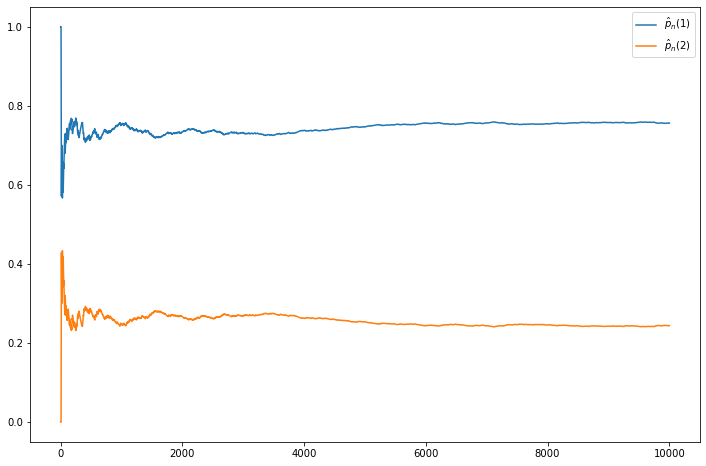

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 8))
plt.plot(np.arange(1, n+1), p1, label=r'$\hat{p}_n(1)$')
plt.plot(np.arange(1, n+1), p2, label=r'$\hat{p}_n(2)$')
plt.legend()
plt.show()

Note that the values do converge to $\pi = (0.75, 0.25)$.

**Exercise 24.6.5**.  An important Markov chain is the **branching process** which is used in biology, genetics, nuclear physics and many other fields.  Suppose that an animal has $Y$ children.  Let $p_k = \mathbb{P}(Y = k)$.  Hence $p_k \geq 0$ for all $k$ and $\sum_{k = 0}^\infty p_k = 1$.  Assume each animal has the same lifespan and that they produce offspring according to the distribution $p_k$.  Let $X_n$ be the number of animals in the $n$-th generation.  Let $Y_1^{(n)}, \dots, Y_{X_n}^{(n)}$ be the offspring produced in the $n$-th generation.  Note that

$$ X_{n+1} = Y_1^{(n)} + \dots + Y_{X_n}^{(n)}$$

Let $\mu = \mathbb{E}(Y)$ and $\sigma^2 = \mathbb{V}(Y)$.  Assume throughout this question that $X_0 = 1$.  Let $M(n) = \mathbb{E}(X_n)$ and $V(n) = \mathbb{V}(X_n)$.

**(a)**  Show that $M(n + 1) = \mu M(n)$ and that $V(n + 1) = \sigma^2 M(n) + \mu^2 V(n) $.

**(b)**  Show that $M(n) = \mu^n$ and that $V(n) = \sigma^2 \mu^{n-1} (1 + \mu + \dots + \mu^{n - 1})$.

**(c)**  What happens to the variance if $\mu > 1$?  What happens to the variance if $\mu = 1$?  What happens to the variance if $\mu < 1$?

**(d)**  The population goes extinct if $X_n = 0$ for some $n$.  Let us thus define the extinction time $N$ by

$$ N = \min \{ n : X_n = 0 \} $$

Let $F(n) = \mathbb{P}(N \leq n)$ be the CDF of the random variable $N$.  Show that

$$ F(n) = \sum_{k=0}^\infty p_k \left( F(n - 1) \right)^k, \quad n = 1, 2, \dots $$

Hint: note that the event $\{ N \leq n \}$ is the same event as $\{ X_n = 0 \}$.  Thus $\mathbb{P}(N \leq n) = \mathbb{P}(X_n = 0)$.  Let $k$ be the number of offspring of the original event.  The population becomes extinct at time $n$ if and only if each of the $k$ sub-populations generated from the $k$ offspring goes extinct in $n - 1$ generations.

**(e)**  Suppose that $p_0 = 1/4$, $p_1 = 1/2$, $p_2 = 1/4$.  Use the formula from (d) to compute the CDF $F(n)$.

**Solution**.

**(a)**  We have:

$$ M(n + 1) = \mathbb{E}[X_{n + 1}] = \mathbb{E}\left[ \sum_{i = 1}^{X_n} Y_i^{(n)} \right] = \mathbb{E}\left[ \sum_{i = 1}^{X_n} \mathbb{E}[Y_i^{(n)}] \right] = \mathbb{E}\left[ \sum_{i = 1}^{X_n} \mu \right]  = \mu \mathbb{E}[X_n] = \mu M(n)$$

We also have:

$$
\begin{align}
V(n + 1) &= \mathbb{V}[X_{n + 1}] = \mathbb{E}[X_{n + 1}^2] - \mathbb{E}[X_{n + 1}]^2 \\
&= \mathbb{E}\left[\left( \sum_{i = 1}^{X_n} Y_i^{(n)} \right)^2\right] - \mu^2 M(n)^2 \\
&= \mathbb{E}\left[ \sum_{i = 1}^{X_n} \left( Y_i^{(n)} \right)^2 + \sum_{i = 1}^{X_n} \sum_{j = 1, j \neq i}^{X_n} Y_i^{(n)} Y_j^{(n)} \right] - \mu^2 M(n)^2 \\
&= \mathbb{E}\left[ \sum_{i = 1}^{X_n} \mathbb{E}\left[\left( Y_i^{(n)} \right)^2\right] + \sum_{i = 1}^{X_n} \sum_{j = 1, j \neq i}^{X_n} \mathbb{E}\left[ Y_i^{(n)} Y_j^{(n)} \right] \right] - \mu^2 M(n)^2 \\
&= \mathbb{E}\left[ \sum_{i = 1}^{X_n} \left( \mathbb{V}[Y_i^{(n)}] +  \mathbb{E}\left[ Y_i^{(n)} \right]^2 \right) + \sum_{i = 1}^{X_n} \sum_{j = 1, j \neq i}^{X_n} \mathbb{E}\left[ Y_i^{(n)} \right] \mathbb{E} \left[ Y_j^{(n)} \right] \right] - \mu^2 M(n)^2 \\
&= \mathbb{E}\left[ \sum_{i = 1}^{X_n} \left( \sigma^2 + \mu^2 \right) + \sum_{i = 1}^{X_n} \sum_{j = 1, j \neq i}^{X_n} \mu^2 \right] - \mu^2 M(n)^2 \\
&= \mathbb{E} \left[ X_n (\sigma^2 + \mu^2) + X_n (X_n - 1) \mu^2 \right] - \mu^2 M(n)^2 \\
&= \mathbb{E} \left[ X_n \sigma^2 + X_n^2 \mu^2 \right] - \mu^2 M(n)^2 \\
&= \sigma^2 \mathbb{E} [ X_n ] + \mu^2 \mathbb{E} [ X_n^2 ] - \mu^2 M(n)^2 \\
&= \sigma^2 M(n) + \mu^2 (V(n) + M(n)^2) - \mu^2 M(n)^2 \\
&= \sigma^2 M(n) + \mu^2 V(n)
\end{align}
$$ 

**(b)**

Since the initial population is 1, $M(0) = 1$; since $M(n + 1) = \mu M(n)$, it follows by induction that $M(n) = \mu^n$.

Now, we also have that the initial population is known, so $V(0) = 0$. By induction,

$$
\begin{align}
V(n + 1) &= \sigma^2 M(n) + \mu^2 V(n) \\
&= \sigma^2 \mu^n + \mu^2 \left( \sigma^2 \mu^{n - 1} \left( 1 + \mu + \dots + \mu^{n - 1}\right) \right) \\
&= \sigma^2 \mu^n \left(1 + \mu \left( 1 + \mu + \dots + \mu^{n - 1} \right) \right) \\
&= \sigma^2 \mu^n \left(1 + \mu + \dots + \mu^n \right)
\end{align}
$$

**(c)**  If $\mu \neq 1$, we can add up the geometric sum and write

$$ V(n) = \sigma^2 \mu^n \frac{1 - \mu^{n}}{1 - \mu}$$

- For $\mu > 1$, $V(n)$ grows exponentially.  
- For $\mu < 1$, $V(n)$ converges to 0.  
- For $\mu = 1$, we have $V(n) = n \sigma^2$, which grows linearly.

**(d)**  Following the reasoning in the hint,

$$
\begin{align}
F(n) &= \mathbb{P}(N \leq n) = \mathbb{P}(X_n = 0) \\
&= \sum_{k=0}^\infty \mathbb{P}(X_n = 0 | X_1 = k) \mathbb{P}(X_1 = k) \\
&= \sum_{k=0}^\infty \mathbb{P}(Y_i^{(n - 1)} = 0 \text{ for all } i | X_1 = k) \mathbb{P}(X_1 = k) \\
&= \sum_{k=0}^\infty \left( \prod_{i=1}^k \mathbb{P}(Y_i^{(n - 1)} = 0 | X_1 = k) \right) \mathbb{P}(X_1 = k) \\
&= \sum_{k=0}^\infty \left( \prod_{i=1}^k F(n-1) \right) p_k \\
&= \sum_{k=0}^\infty p_k \left( F(n - 1)\right)^k
\end{align}
$$

**(e)**  The recurrence formula is:

$$ F(n + 1) = p_0 + p_1 F(n) + p_2 F(n)^2 = \frac{1}{4} + \frac{1}{2} F(n) + \frac{1}{4} F(n)^2 = \frac{1}{4} (F(n) + 1)^2$$

with initial value $F(0) = 0$ (since we start with a non-extinct population).

In [6]:
import numpy as np

N = 1000
F = np.empty(N)

F[0] = 0
for n in range(1, N):
    F[n] = (F[n - 1] + 1)**2 / 4

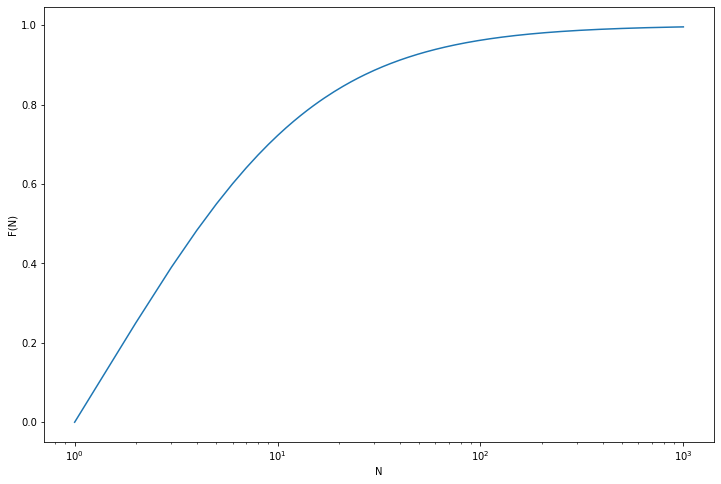

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 8))
plt.plot(np.arange(1, N + 1), F)
plt.xlabel('N')
plt.ylabel('F(N)')
plt.xscale('log')
plt.show()

**Exercise 24.6.6**. Let

$$ P = \begin{bmatrix}
0.40 & 0.50 & 0.10 \\
0.05 & 0.70 & 0.25 \\
0.05 & 0.50 & 0.45
\end{bmatrix}$$

Find the stationary distribution $\pi$.

**Solution**.  The stationary distribution $\pi$  satisfies $\pi = \pi P$, so it is a (normalized) left eigenvector of $P$, or a right eigenvector of $P^T$.

In [8]:
import numpy as np
from numpy.linalg import eig

P = np.array([[0.4, 0.5, 0.1], [0.05, 0.7, 0.25], [0.05, 0.5, 0.45]])

In [9]:
w, v = eig(P.T)
pi = v[:, 0]
print(pi)

[0.11041049 0.89708523 0.42784065]


In [10]:
print(pi @ P)

[0.11041049 0.89708523 0.42784065]


**Exercise 24.6.7**.  Show that if $i$ is a recurrent state and $i \leftrightarrow j$, then $j$ is a recurrent state.

**Solution**.

Since $i$ is recurrent, $\sum_n p_{ii}(n) = \infty$.  But 

$$\sum_n p_{jj}(n) \geq \sum_{a, b, c} p_{ji}(a) p_{ii}(b) p_{ij}(c) \geq \sum_b p_{ji}(a') p_{ii}(b) p_{ij}(c')$$

for some $a'$ such that $p_{ji}(a') > 0$ (which exists because $j \rightarrow i$) and some $c'$ such that $p_{ij}(c') > 0$ (which exists because $i \rightarrow j$).  Then this sum is lower bounded by 

$$\frac{1}{p_{ji}(a') p_{ij}(c')} \sum_b p_{ii}(b)$$

which diverges because $\sum_n p_{ii}(n) = \infty$, so $j$ must be a recurrent state.

**Exercise 24.6.8**.  Let

$$ P = \begin{bmatrix}
1/3 & 0   & 1/3 & 0 & 0 & 1/3 \\
1/2 & 1/4 & 1/4 & 0 & 0 & 0   \\
0   & 0   & 0   & 0 & 1 & 0   \\
1/4 & 1/4 & 1/4 & 0 & 0 & 1/4 \\
0   & 0  & 1    & 0 & 0 & 0   \\
0   & 0  & 0    & 0 & 0 & 1
\end{bmatrix}$$

Which states are transient?  Which states are recurrent?

**Solution**.

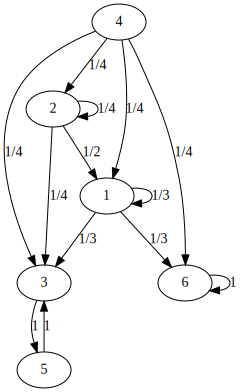

In [11]:
from graphviz import Digraph

d = Digraph()

d.edge('1', '1', label='1/3')
d.edge('1', '3', label='1/3')
d.edge('1', '6', label='1/3')

d.edge('2', '1', label='1/2')
d.edge('2', '2', label='1/4')
d.edge('2', '3', label='1/4')

d.edge('3', '5', label='1')

d.edge('4', '1', label='1/4')
d.edge('4', '2', label='1/4')
d.edge('4', '3', label='1/4')
d.edge('4', '6', label='1/4')

d.edge('5', '3', label='1')

d.edge('6', '6', label='1')

d

States 3, 5, 6 are recurrent:

- A chain starting on state 6 will forever stay in state 6.
- A chain starting on states 3 or 5 will bounce between states 3 and 5 forever.

Other states are not recurrent, as they may eventually fall into state 6 and never reach other state after.

**Exercise 24.6.9**.  Let

$$ P = \begin{bmatrix}
0 & 1 \\
1 & 0
\end{bmatrix}$$

Show that $\pi = (1/2, 1/2)$ is a stationary distribution.  Does this chain converge?  Why / why not?

**Solution**.  The distribution is stationary if and only if $\pi = \pi P$, and 

$$ \pi P = \begin{bmatrix} 1/2 & 1/2 \end{bmatrix}
\begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
= \begin{bmatrix} 1/2 & 1/2 \end{bmatrix} = \pi
$$

This chain does not converge: it will always oscillate between states 1 and 2 with probability 1.

**Exercise 24.6.10**.  Let $0 < p < 1$ and $q = 1 - p$.  Let

$$ P = 
\begin{bmatrix}
q & p & 0 & 0 & 0 \\
q & 0 & p & 0 & 0 \\
q & 0 & 0 & p & 0 \\
q & 0 & 0 & 0 & p \\
1 & 0 & 0 & 0 & 0
\end{bmatrix}
$$

Find the limiting distribution of the chain.

**Solution**.

Solving $\pi P = \pi$, we get:

$$ \pi = \begin{bmatrix} 
\frac{1 - p}{p^4(1 - p^5)} &
\frac{1 - p}{p^3(1 - p^5)} &
\frac{1 - p}{p^2(1 - p^5)} &
\frac{1 - p}{p(1 - p^5)} &
\frac{1 - p}{1 - p^5}
\end{bmatrix} $$

We can verify this is the limiting distribution:

$$ 
\begin{align}
\pi P &= \begin{bmatrix} \frac{1 - p}{p^4(1 - p^5)} &
\frac{1 - p}{p^3(1 - p^5)} &
\frac{1 - p}{p^2(1 - p^5)} &
\frac{1 - p}{p(1 - p^5)} &
\frac{1 - p}{1 - p^5}
\end{bmatrix}
\begin{bmatrix}
1 - p & p & 0 & 0 & 0 \\
1 - p & 0 & p & 0 & 0 \\
1 - p & 0 & 0 & p & 0 \\
1 - p & 0 & 0 & 0 & p \\
1 & 0 & 0 & 0 & 0
\end{bmatrix} \\
&= \begin{bmatrix} 
\frac{(1 - p)^2}{p^4(1 - p^5)}
+ \frac{(1 - p)^2}{p^3(1 - p^5)}
+ \frac{(1 - p)^2}{p^2(1 - p^5)}
+ \frac{(1 - p)^2}{p(1 - p^5)}
+ \frac{1 - p}{1 - p^5} &
\frac{1 - p}{p^3(1 - p^5)} &
\frac{1 - p}{p^2(1 - p^5)} &
\frac{1 - p}{p(1 - p^5)} &
\frac{1 - p}{1 - p^5}
\end{bmatrix} \\
&= \begin{bmatrix} 
\frac{(1 - p)^2(1 + p + p^2 + p^3) + p^4(1 - p)}{p^4(1 - p^5)} &
\frac{1 - p}{p^3(1 - p^5)} &
\frac{1 - p}{p^2(1 - p^5)} &
\frac{1 - p}{p(1 - p^5)} &
\frac{1 - p}{1 - p^5}
\end{bmatrix} \\
&= \begin{bmatrix} 
\frac{1 - p}{p^4(1 - p^5)} &
\frac{1 - p}{p^3(1 - p^5)} &
\frac{1 - p}{p^2(1 - p^5)} &
\frac{1 - p}{p(1 - p^5)} &
\frac{1 - p}{1 - p^5}
\end{bmatrix} \\
&= \pi
\end{align}
$$

**Exercise 24.6.11**.  Let $X(t)$ be an inhomogeneous Poisson process with intensity function $\lambda(t) > 0$.  Let $\Lambda(t) = \int_0^t \lambda(u) du$.  Define $Y(s) = X(t)$ where $s = \Lambda(t)$.  Show that $Y(s)$ is a homogeneous Poisson process with intensity $\lambda = 1$.

**Solution**.

We have:  $Y(s) = X(\Lambda^{-1}(s))$ and $X(t) \sim \text{Poisson}(\Lambda(t))$, so 

$$Y(s) \sim \text{Poisson}(\Lambda(\Lambda^{-1}(s)) = \text{Poisson}(s) = \text{Poisson}(\lambda_Y \cdot s)$$

which is the desired result with $\lambda_Y = 1$.

**Exercise 24.6.12**.  Let $X(t)$ be a Poisson process with intensity $\lambda$.  Find the conditional distribution of $X(t)$ given that $X(t + s) = n$.

**Solution**.  The random variables $X(t) - X(0) = X(t)$ and $Y(s) = X(t + s) - X(t)$ are independent, as they are both count increments, with $X(t) \sim \text{Poisson}(\lambda t)$ and $Y(s) \sim \text{Poisson}(\lambda s)$. Then:

$$ 
\begin{align}
\mathbb{P}\left(X(t) = x | X(t + s) = n\right) &= \mathbb{P}\left(X(t) = x | X(t) + Y(s) = n\right) \\
&= \frac{\mathbb{P}\left(X(t) = x, X(t) + Y(s) = n\right)}{\mathbb{P}\left(X(t) + Y(s) = n\right)} \\
&= \frac{\mathbb{P}\left(X(t) = x, Y(s) = n - x\right)}{\sum_{0 \leq j \leq n} \mathbb{P}\left(X(t) = j, Y(s) = n - j\right)} \\
&= \frac{\mathbb{P}\left(X(t) = x\right) \mathbb{P}\left(Y(s) = n - x\right)}{\sum_{j=0}^n \mathbb{P}\left(X(t) = j\right) \mathbb{P}\left( Y(s) = n - j\right)} \\
&= \frac{f(x)}{\sum_{j=0}^n f(j) }
\end{align}
$$

where $f(x) = \mathbb{P}\left(X(t) = x\right) \mathbb{P}\left( Y(s) = n - x\right)$.  But we have:

$$ f(x) = \frac{(\lambda t)^x e^{-\lambda t}}{x!}\frac{(\lambda s)^{n - x} e^{-\lambda s}}{(n - x)!} = \frac{\lambda^n e^{-\lambda (t + s)}}{n!} \binom{n}{x} t^x s^{n - x} $$

Replacing on the expression above and cancelling the factors that do not depend on $x$, we get

$$ \mathbb{P}\left(X(t) = x | X(t + s) = n\right) = \frac{f(x)}{\sum_{j=0}^n f(j) } = \frac{\binom{n}{x} t^x s^{n - x}}{\sum_{j=0}^n \binom{n}{j} t^j s^{n - j}} 
= \frac{\binom{n}{x} t^x s^{n - x}}{(t + s)^n} = \binom{n}{x} \left( \frac{t}{t + s} \right)^x \left( \frac{s}{t + s}\right)^{n - x}$$

using the binomial expansion $(t + s)^n = \sum_{j=0}^n \binom{n}{j} t^j s^{n - j}$.  Therefore, the conditional distribution follows a Binomial distribution,

$$ X(t) | X(t + s) = n \sim \text{Binomial}\left(n, \frac{t}{t + s} \right)$$

**Exercise 24.6.13**.  Let $X$ be a Poisson process with intensity $\lambda$.  Find the probability that $X(t)$ is odd, i.e. $\mathbb{P}(X(t) = 1, 3, 5, \dots)$.

**Solution**.  Expanding using the probability mass function,

$$
\mathbb{P}(X(t) \text{ is odd}) = \sum_{k=0}^\infty \frac{(\lambda t)^{2k + 1} e^{-\lambda t}}{(2k + 1)!} = e^{-\lambda t} \text{sinh} (\lambda t) = \frac{1}{2}\left( 1 - e^{-2 \lambda t}\right)
$$

**Exercise 24.6.14**.  Suppose that people logging in to the University computer system is described by a Poisson process $X(t)$ with intensity $\lambda$.  Assume that a person stays logged in for some random time with CDF $G$. Assume these times are all independent.  Let $Y(t)$ be the number of people on the system at time $t$.  Find the distribution of $Y(t)$.

**Solution**.

The number of people arriving at time period $j$ is $A(j) \equiv X(j) - X(j-1)$, where $X(0) = 0$.  Let $W_i^{(j)}$ be the amount of time spent by the $i$-th person that arrived at time $j$.  Then, the total number of people at time $t$ is:

$$ Y(t) = \sum_{j=1}^t \sum_{i=1}^{A(j)} I\left(W_i^{(j)} \geq t - j\right) $$

where $I(x) = 1$ if $x$ is true and $0$ otherwise, and the terms count only the people who are still logged in after an extra time $t - j$ elapsed.

Each value $I\left(W_i^{(j)} \geq x\right)$ follows a distribution given by $1 - G(x)$, measuring the probability of a person staying longer than time $x$, and they are all independent.

We can write the sum above as:

$$ Y(t) = \sum_{j=1}^t B(j), \quad B(j) =\sum_{i = 1}^{A(j)} I\left(W_i^{(j)} \geq t - j\right) $$

Note that this implies that $B(j) | A(j) = n$ follows a binomial distribution with parameters $n$ and $\mathbb{P}\left(W_i^{(j)} \geq t - j \right) = 1 - G(t - j)$.

Since $A(j) \sim \text{Poisson}(\lambda)$ and  $B(j) | A(j) = n \sim \text{Binomial}(n, 1 - G(t - j))$, the marginal distribution of $B(j)$ is $B(j) \sim \text{Poisson}\left(\lambda (1 - G(t - j))\right)$. Therefore, $Y$ being the sum of independent Poisson variables $B(j)$, we get that $Y$ is a Poisson process with inhomogeneous rate $\lambda_Y(t)$,

$$ Y(t) \sim \text{Poisson}\left( \lambda_Y(t) \right), \quad \lambda_Y(t) = \lambda \left[ \sum_{j=1}^t(1 - G(t - j)) \right]$$

**Exercise 24.6.15**.  Let $X(t)$ be a Poisson process with intensity $\lambda$.  Let $W_1, W_2, \dots$ be the waiting times.  Let $f$ be an arbitrary function.  Show that

$$ \mathbb{E} \left[ \sum_{i=1}^{X(t)} f(W_i) \right] = \lambda \int_0^t f(w) dw $$

**Solution**.

When conditioning on $X(t) = n$, the waiting times are uniformly distributed on the interval $[0, t]$, so $\sum_{i=1}^n f(W_i)$ has the same distribution as  $\sum_{i=1}^n f\left(U_i^{(n)}\right)$, for $U_i^{(n)} \sim \text{Uniform}(0, t)$.  Then the expectation of $f\left(U_i^{(n)}\right)$ is 

$$\mathbb{E}\left[ f\left(U_i^{(n)}\right) \right] = \int_0^t f(w) f_{U_i^{(n)}}(w) dw = \frac{1}{t} \int_0^t f(w) dw$$

Then, we have:

$$ 
\begin{align}
\mathbb{E}\left[ \sum_{i=1}^{X(t)} f(W_i) \right] 
&= \sum_{n = 0}^\infty \mathbb{E}\left[ \sum_{i=1}^{X(t)} f(W_i) \; \Bigg| \; X(t) = n\right] \mathbb{P} \left[ X(t) = n \right] \\
&= \sum_{n = 0}^\infty \mathbb{E}\left[ \sum_{i=1}^n f\left(U_i^{(n)}\right) \right] \mathbb{P} \left[ X(t) = n \right] \\
&= \sum_{n = 0}^\infty \frac{n}{t} \left( \int_0^t f(w) dw \right) \mathbb{P} \left[ X(t) = n \right] \\
&= \frac{1}{t} \left( \int_0^t f(w) dw \right) \sum_{n=0}^\infty n \; \mathbb{P} \left[ X(t) = n \right] \\
&= \frac{1}{t} \left( \int_0^t f(w) dw \right) \mathbb{E} \left[ X(t) \right] \\
&= \frac{1}{t} \left( \int_0^t f(w) dw \right) \lambda t \\
&= \lambda \int_0^t f(w) dw
\end{align}
$$

**Exercise 24.6.16**.  A two dimensional Poisson process is a process of random points in the plane such that (i) for any set $A$, the number of points falling in $A$ is Poisson with mean $\lambda \mu(A)$ where $\mu(A)$ is the area of $A$, (ii) the number of points in nonoverlapping regions is independent.  Consider an arbitrary point $x_0$ in the plane.  Let $X$ denote the distance from $x_0$ to the nearest point.  Show that

$$ \mathbb{P}(X > t) = e^{-\lambda \pi t^2} $$

and

$$ \mathbb{E}(X) = \frac{1}{2 \sqrt{\lambda}} $$

**Solution**.  The distance $X$ from $x_0$ to the nearest point is at least $t$ if and only if no points lie within a circle of radius $t$ centered in $x_0$.  This circle $C$ has area $\mu(C) = \pi t^2$, and so

$$ \mathbb{P}(X > t) = \mathbb{P}(\# \{\text{points in C} \} = 0) = f_C(0) = \frac{\lambda_C^0 e^{-\lambda_C}}{0!} = e^{-\lambda_C} = e^{-\lambda \pi t^2} $$

Given that $X$ has a CDF of $F_X(x) = 1 - e^{-\lambda \pi x^2}$ for $x \geq 0$, its PDF is $f_X(x) = 2 \lambda \pi x e^{-\lambda \pi x^2}$, and its mean is

$$ \mathbb{E}(X) = \int_0^\infty x f_X(x) \; dx  = \int_0^\infty 2 \lambda \pi x^2 e^{-2 \lambda \pi x^2} \; dx = \frac{1}{2 \sqrt{\lambda}}$$